In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from scipy import stats
pd.set_option("display.max_rows", None) 
import scipy
from scipy.stats import norm
import seaborn as sns
import matplotlib.ticker as mtick
import datetime
import glob
from scipy.optimize import minimize,Bounds
from scipy import stats
import rebalance

plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['axes.facecolor'] = 'snow'
plt.rcParams['legend.facecolor'] = 'white'
sns.set_style({"axes.grid" : True,"grid.linestyle" : ":"})

In [2]:
data = pd.read_pickle('global_mktdata_20220812.pkl')

In [3]:
ativos = data['spec']
close = data['close']

In [4]:
lista_ativos = ['Chicago Wheat',
'Kansas Wheat',
'Corn',
'Soybeans',
'Coffee',
'Sugar',
'Cocoa',
'Cotton',
'WTI',
'Heating Oil',
'RBSOB Gasoline',
'Brent',
'Gasoil',
'Natural Gas',
'Lean Hogs',
'Live Cattle',
'Feeder Cattle',
'Aluminum',
'Copper LME',
'Nickel',
'Lead',
'Zinc',
'Iron',
'Copper CME',
'Gold',
'Silver',
'Palladium',
'Platinum',
'DAX',
'Dow Jones',
'EEM',
'EWZ',
'FTSE 100',
'FTSE China A50',
'NIFTY 50',
'NIKKEI 225',
'QQQ',
'RTS',
'S&P 500',
'SPY',
'VIX',
]

In [5]:
ativos = ativos[ativos.name.isin(lista_ativos)]
ativos = ativos[ativos.contract_type != 'spot']
ativos = ativos[ativos.sub_asset_class2 != 'DESK']
ativos_dict = dict(zip(ativos.ticker, ativos.name))


In [6]:
columns = ativos.ticker.to_list()
columns.append('date')

In [7]:
close = close.reset_index()
close = close[columns]
#close = close[close.date>='2014-01-02']
close = close.set_index('date')
close.head()

ticker,W 1 A:00_0_R Comdty,KW1 A:00_0_R Comdty,C 1 A:00_0_R Comdty,S 1 A:00_0_R Comdty,KC1 A:00_0_R Comdty,SB1 A:00_0_R Comdty,CC1 A:00_0_R Comdty,CT1 A:00_0_R Comdty,CL1 R:12_0_R Comdty,HO1 R:12_0_R Comdty,...,IH1 A:00_0_R Index,VE1 A:00_0_R Index,SPY US Equity,EEM US Equity,QQQ US Equity,SPY US Equity,EEM US Equity,QQQ US Equity,EWZ US Equity,UX1 A:00_0_R Index
date,,,,,,,,,,,,,,,,,,,,,
2000-01-03,4713.4375,2493.8750,1264.8125,284.1250,2325.36,19.43,2001.0,228.30,NaN,NaN,...,NaN,NaN,96.1355,NaN,81.9185,96.1355,NaN,81.9185,NaN,NaN
2000-01-04,4708.6875,2491.6250,1279.0000,288.4375,2320.37,18.38,2016.0,226.78,113.94,87.92,...,NaN,NaN,92.3760,NaN,76.2987,92.3760,NaN,76.2987,NaN,NaN
2000-01-05,4756.2500,2512.0625,1279.0000,291.8125,2367.27,18.51,2004.0,230.49,111.09,86.32,...,NaN,NaN,92.5412,NaN,74.3534,92.5412,NaN,74.3534,NaN,NaN
2000-01-06,4732.5000,2500.6875,1283.7500,290.8750,2332.34,18.38,2028.0,232.81,110.51,85.97,...,NaN,NaN,91.0540,NaN,69.2438,91.0540,NaN,69.2438,NaN,NaN
2000-01-07,4794.3750,2525.6875,1304.1875,292.8750,2278.45,18.60,2057.0,241.22,108.01,83.99,...,NaN,NaN,96.3420,NaN,77.8117,96.3420,NaN,77.8117,NaN,NaN


In [8]:
tickers = close.columns.to_list()

### RETURNS
---

In [9]:
result_df = close[tickers].pct_change()
result_df =result_df.fillna(0)
result_df = result_df.T.drop_duplicates().T

# rename columns
result_df = result_df.rename(columns=ativos_dict)
result_df.describe()


ticker,Chicago Wheat,Kansas Wheat,Corn,Soybeans,Coffee,Sugar,Cocoa,Cotton,WTI,Heating Oil,...,DAX,NIKKEI 225,FTSE China A50,NIFTY 50,RTS,SPY,EEM,QQQ,EWZ,VIX
count,5900.000000,5900.000000,5900.000000,5900.000000,5900.000000,5900.000000,5900.000000,5900.000000,5900.000000,5900.000000,...,5900.000000,5900.000000,5900.000000,5900.000000,5900.000000,5900.000000,5900.000000,5900.000000,5900.000000,5900.000000
mean,-0.000119,-0.000021,0.000020,0.000379,-0.000191,0.000178,0.000192,0.000008,0.000293,0.000473,...,0.000164,0.000228,0.000205,0.000483,0.000387,0.000328,0.000415,0.000383,0.000493,-0.001358
std,0.018808,0.017540,0.016452,0.014311,0.020368,0.019252,0.017988,0.016392,0.025397,0.021752,...,0.014351,0.014813,0.014945,0.014366,0.021582,0.012244,0.016403,0.017114,0.023793,0.045028
min,-0.095341,-0.086009,-0.076180,-0.071421,-0.125281,-0.116308,-0.095110,-0.068724,-0.433386,-0.219285,...,-0.110887,-0.130706,-0.147675,-0.149941,-0.354342,-0.109424,-0.161661,-0.119788,-0.230928,-0.255319
25%,-0.011343,-0.010554,-0.008910,-0.007328,-0.011601,-0.010727,-0.009714,-0.008538,-0.011737,-0.010845,...,-0.006225,-0.006708,-0.003260,-0.005590,-0.005220,-0.004313,-0.005450,-0.006068,-0.011184,-0.020896
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000338,0.000000,0.000000,0.000000,0.000000,0.000422,0.000000,0.000650,0.000000,0.000000
75%,0.010275,0.009638,0.008645,0.008044,0.010076,0.011063,0.010111,0.008653,0.012157,0.011605,...,0.007069,0.007652,0.003735,0.007149,0.006763,0.005782,0.007131,0.007658,0.012501,0.008833
max,0.091922,0.084342,0.090462,0.066468,0.178127,0.089234,0.086928,0.086412,0.251429,0.131544,...,0.128361,0.206940,0.174747,0.185889,0.426739,0.145198,0.255963,0.168422,0.255804,1.126400


### JARQUE-BERA TEST
---


In [10]:
jarque_bera_test = stats.jarque_bera(result_df[lista_ativos])
jarque_bera_test

Jarque_beraResult(statistic=53565687.03824143, pvalue=0.0)

In [11]:
jarque_bera_df = pd.DataFrame(columns=['ativo','mean','std','skewness','kurtosis','statistic','p-value'])
for asset in lista_ativos:
    jarque_bera_test = stats.jarque_bera(result_df[asset])
    mean = result_df[asset].mean()
    std = result_df[asset].std()
    skewness = result_df[asset].skew()
    kurtosis = result_df[asset].kurt()
    jarque_bera_df = jarque_bera_df.append({'ativo':asset,'mean':mean,'std':std,'skewness':skewness,'kurtosis':kurtosis,'statistic':jarque_bera_test.statistic,'p-value':jarque_bera_test.pvalue},ignore_index=True)

jarque_bera_df['statistic'] =  jarque_bera_df['statistic'].apply(lambda x: '%.3f' % x)
jarque_bera_df['p-value'] =  jarque_bera_df['p-value'].apply(lambda x: '%.5f' % x)
jarque_bera_df

,ativo,mean,std,skewness,kurtosis,statistic,p-value
0,Chicago Wheat,-0.000119,0.018808,0.210818,2.080882,1105.315,0.00000
1,Kansas Wheat,-0.000021,0.017540,0.198807,1.780484,815.959,0.00000
2,Corn,0.000020,0.016452,0.121751,2.544781,1602.596,0.00000
3,Soybeans,0.000379,0.014311,-0.113159,2.473353,1512.682,0.00000
4,Coffee,-0.000191,0.020368,0.341726,3.622867,3334.101,0.00000
5,Sugar,0.000178,0.019252,-0.096236,1.907080,900.721,0.00000
6,Cocoa,0.000192,0.017988,-0.071572,2.268492,1266.831,0.00000
7,Cotton,0.000008,0.016392,0.048922,1.630545,654.022,0.00000
8,WTI,0.000293,0.025397,-0.641141,27.677419,188389.252,0.00000
9,Heating Oil,0.000473,0.021752,-0.165222,5.280991,6868.594,0.00000


### Returns Distribution
---

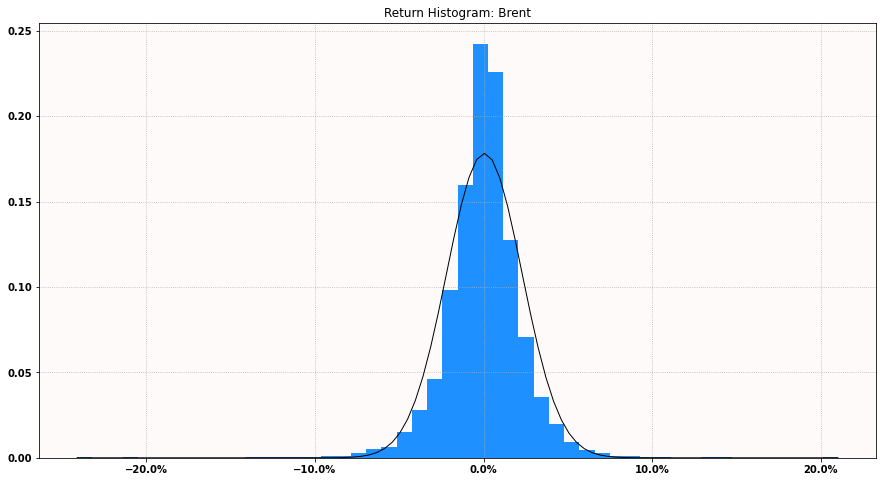

In [12]:
asset = 'Brent'
fig,ax_plt = plt.subplots(figsize=(15,8))

(100*result_df[asset]).hist(ax=ax_plt,bins=50,color='dodgerblue',density=1)
ax_plt.xaxis.set_major_formatter(mtick.PercentFormatter())
ax_plt.set_title('Return Histogram: '+asset)

# Plot a Normal Fitted
mu, sigma = scipy.stats.norm.fit(100*result_df[asset])
[xmin, xmax] = [100*result_df[asset].min(),100*result_df[asset].max()]
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, sigma)
plt.plot(x, p, 'k', linewidth=1)

plt.show()



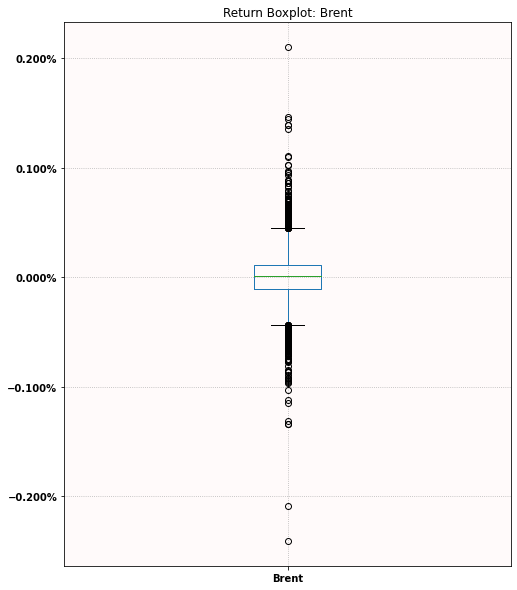

In [13]:
fig,ax_plt = plt.subplots(figsize=(8,10))

result_df.boxplot(column=asset,ax=ax_plt)
ax_plt.yaxis.set_major_formatter(mtick.PercentFormatter())
ax_plt.set_title('Return Boxplot: ' + asset)
plt.show()

## Polynommial Goal Programming
---

### Maximize Returns : $Máx \sum_{i=1}^{N} x_i\overline{r}_i$
#### Constraint 1 : $\sum_{i=1}^{N} x_i = 1$
#### Constraint 2 : $x_i \geq 0$

In [14]:
teste = (result_df[asset]).rolling(252).mean()
#teste = teste.reset_index().merge(result_df[asset].reset_index())
teste = pd.DataFrame([teste])
teste = teste.stack().reset_index(level=[0]).drop('level_0',axis=1).reset_index().rename(columns={0:'{}_roll'.format(asset)})
teste = teste.merge(result_df[asset].reset_index(),on='date')

In [15]:
result_rolling = (result_df).rolling(252).mean()
result_rolling = result_rolling.dropna()


In [16]:

def mean_objective(x,result_df):
    result = 0
    for i,row in jarque_bera_df.iterrows():
        a = x[i] * row['mean']
        result = result-a
    return result

def constraint1(x):
    soma = 0
    for i in range(0,len(x)):
        soma = soma + x[i]
    return soma - 1


In [17]:
import random
randomlist = []
for i in range(0,len(jarque_bera_df)):
    n = random.uniform(0,0)
    randomlist.append(n)

In [18]:
con1 = {'type':'eq','fun':constraint1}
const = [con1]

In [19]:
sol = minimize(mean_objective,randomlist,method='SLSQP',constraints=const,bounds=Bounds(0,1))

TypeError: mean_objective() missing 1 required positional argument: 'result_df'

In [ ]:
sol

In [ ]:
sum(sol.x)